In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import spacy
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import string
from wordcloud import WordCloud
import re

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Data Cleaning, Preprocessing and basic Analysis

In [0]:
def process_text(text):

  # replace unnecessary characters with space
  s = re.sub(r"\\n", " ", str(text).lower())
  s = re.sub(r":", "", s) 
  s = re.sub(r"\.", " ", s)
  s = re.sub(r"\,", " ", s)
  s = re.sub(r"\!", " ", s)
  s = re.sub(r"\;", " ", s)
  s = re.sub(r"\/", " ", s)
  s = re.sub(r"[^A-Za-z0-9^+-=]", " ", s)    
  
  # tokenize the lower cased string 
  s = s.split()  
  
  #allow only words with length more than 3 and replace dem and rep with their full names
  filtered_s = []
  for w in s:
    if w == 'dem' or w == 'dems' or w == 'democrat':
      w = 'democrats'
    if w == 'rep' or w == 'reps' or w == 'republican':
      w = 'republicans'
    if len(w)>3:
      filtered_s.append(w)
  
  s = filtered_s
  
  # standard stop words list
  stop_words = list(stopwords.words('english'))
  
  # most fequently repeated irrelevant keywords
  stop_words.append('say')
  stop_words.append('says')
  stop_words.append('saying')
  stop_words.append('said')
  stop_words.append('twitter')
  stop_words.append('would')
  stop_words.append('like')
  stop_words.append('could')
  stop_words.append('also')
  stop_words.append('https')
  stop_words.append('nytimes')
  stop_words.append('onpolitics')
  stop_words.append('inbox')
  stop_words.append('recent')
  stop_words.append('newsletter')
  stop_words.append('politics')
  stop_words.append('political')
  stop_words.append('york')
  stop_words.append('week')
  stop_words.append('tweeted')
  stop_words.append('tweet')
  stop_words.append('times')
  stop_words.append('states')
  stop_words.append('anything')
  stop_words.append('make')
  stop_words.append('going')
  stop_words.append('told')
  stop_words.append('want')
  stop_words.append('even')
  stop_words.append('issues')
  stop_words.append('think')
  stop_words.append('missing')
  
  stop_words.append('good')
  stop_words.append('morning')
  stop_words.append('monday')
  stop_words.append('tuesday')
  stop_words.append('wednesday')
  stop_words.append('thursday')
  stop_words.append('friday')
  stop_words.append('saturday')
  stop_words.append('sunday')  
  
  stop_words.append('video')
  stop_words.append('watch')
  stop_words.append('ilhan')
  stop_words.append('omar')
  stop_words.append('ocasio')
  stop_words.append('cortez')
  stop_words.append('ocasio-cortez')
  stop_words.append('breaking')    
  stop_words.append('lisa')
  stop_words.append('lerer')
  stop_words.append('margaret')
  stop_words.append('kramer')
    
  # Remove stop_words including  
  s = [w for w in s if not w in stop_words] 
  
  # convert tokens back to document
  s = " ".join(s).rstrip()  
 
  return str(s)


In [0]:
#load dataset 
fake_statements = pd.read_csv('/content/gdrive/My Drive/Stevens/Spring 2019/Web Mining/ProjectDatasets/fake_news_only_statement.csv')[['statement','label']]
real_statements = pd.read_csv('/content/gdrive/My Drive/Stevens/Spring 2019/Web Mining/ProjectDatasets/real_news_only_statements.csv')[['statement','label']]
real_body = pd.read_csv('/content/gdrive/My Drive/Stevens/Spring 2019/Web Mining/ProjectDatasets/real_news_only_body.csv')[['statement','label']]
fake_body = pd.read_csv('/content/gdrive/My Drive/Stevens/Spring 2019/Web Mining/ProjectDatasets/fake_news_only_body.csv')[['statement','label']]


print(fake_statements.shape)
print(real_statements.shape)
print(fake_body.shape)
print(real_body.shape)

print(fake_statements.head())
print(real_statements.head())
print(fake_body.head())
print(real_body.head())

(1008, 2)
(1000, 2)
(1008, 2)
(1000, 2)
                                           statement label
0  WATCH: PRESIDENT TRUMP Presents Tiger Woods Wi...  fake
1  EMBARRASSING: ABC NEWS Uses Tweet From Account...  fake
2  IS JOE BIDEN Using His Grandchildren to Make A...  fake
3  CONFUSED? Biden says ‘Margaret Thatcher’ Calle...  fake
4  WATCH: Registered Republican, Adam Sandler DES...  fake
                                           statement label
0       The ‘On Politics’ Mueller Report Cheat Sheet  real
1       On Politics: The Biggest Stories of the Week  real
2  Twitter Is a Big Deal in Politics. That Doesn’...  real
3  Jonathan Greenblatt, Head of the A.D.L., on th...  real
4              The Zombie Style in American Politics  real
                                           statement label
0  President Trump presented Eldrick “Tiger” Wood...  fake
1  The mainstream media continues to aid the Demo...  fake
2  There are already plenty of unforced errors co...  fake
3  Former Vice P

In [0]:
# combine real/fake headlines and content
df_statements = real_statements.append(fake_statements)
df_body = real_body.append(fake_body)

In [0]:
# basic feature engineering
df_statements['punc_count'] = df_statements['statement'].apply(lambda x: len(re.findall(r'[^A-Za-z0-9\s]',str(x))))

df_body['punc_count'] = df_body['statement'].apply(lambda x: len(re.findall(r'[^A-Za-z0-9\s]',str(x))))

df_statements['word_count'] = df_statements['statement'].apply(lambda x: len(str(x).split()))

df_body['word_count'] = df_body['statement'].apply(lambda x: len(str(x).split()))

df_body['sent_count'] = df_body['statement'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

# remove documents having length less than 4
df_statements = df_statements[df_statements['word_count'] >= 4]
df_body = df_body[df_body['word_count'] >= 4]

print(df_body.head())
print(df_body.tail())
print(df_statements.head())
print(df_statements.tail())

                                           statement label  punc_count  \
0  Hi. Welcome to On Politics, your guide to the ...  real         418   
1  From William Barr’s charged hearing to the lat...  real         143   
2  Hi. Welcome to On Politics, your guide to the ...  real         403   
3  Hi. Welcome to On Politics, your guide to the ...  real         439   
4  Russia didn’t help Donald Trump’s presidential...  real         167   

   word_count  sent_count  
0        1729          66  
1         595          20  
2        1087          52  
3        1320          75  
4         897          33  
                                              statement label  punc_count  \
1003  We don’t know how Sarah Sanders handles all of...  fake         108   
1004  Remember when Oprah was caught on video explai...  fake         152   
1005  After Barack Obama won the 2008 presidential e...  fake         146   
1006  From November 2011 through November 2012, Caro...  fake         341   
10

In [0]:
# clean and preprocess headlines
processed_fake_st = (df_statements['statement'][df_statements.label=='fake'].apply(lambda x: process_text(x)))
processed_real_st = (df_statements['statement'][df_statements.label=='real'].apply(lambda x: process_text(x)))

print(processed_fake_st.shape)
print(processed_real_st.shape)

df_statements['statement'] = processed_real_st.append(processed_fake_st)

(1008,)
(988,)


In [0]:
type(processed_fake_st)

pandas.core.series.Series

In [0]:
# clean and preprocess content
processed_fake_bd = df_body['statement'][df_body.label=='fake'].apply(lambda x: process_text(x))
processed_real_bd = df_body['statement'][df_body.label=='real'].apply(lambda x: process_text(x))

df_body['statement'] = processed_real_bd.append(processed_fake_bd)

print(df_body.head())
print(df_statements.shape)
print(df_statements.tail())

                                           statement label  punc_count  \
0  welcome guide national host open shameful admi...  real         418   
1  william barr charged hearing latest democratic...  real         143   
2  welcome guide national host delivered hard ove...  real         403   
3  welcome guide national host thanks always-deli...  real         439   
4  russia help donald trump presidential campaign...  real         167   

   word_count  sent_count  
0        1729          66  
1         595          20  
2        1087          52  
3        1320          75  
4         897          33  
(1996, 4)
                                              statement label  punc_count  \
1003  priceless mike huckabee responds leftist hater...  fake           1   
1004  remember oprah whole generation white people r...  fake           7   
1005  trump curtail sentence former obama crony demo...  fake           4   
1006  stunning obama 2012 campaign official reveals ...  fake        

In [0]:
print("Content dataset shape before:", df_body.shape)
print("Headlines dataset shape before:",df_statements.shape)

# removing duplicate documents and dropping rows with missing values
df_body.drop_duplicates(inplace=True)
df_body.dropna(inplace=True)
df_statements.drop_duplicates(inplace=True)
df_statements.dropna(inplace=True)

print("Content dataset shape after:",df_body.shape)
print("Headlines dataset shape after:",df_statements.shape)

Content dataset shape before: (1989, 5)
Headlines dataset shape before: (1996, 4)
Content dataset shape after: (1869, 5)
Headlines dataset shape after: (1839, 4)


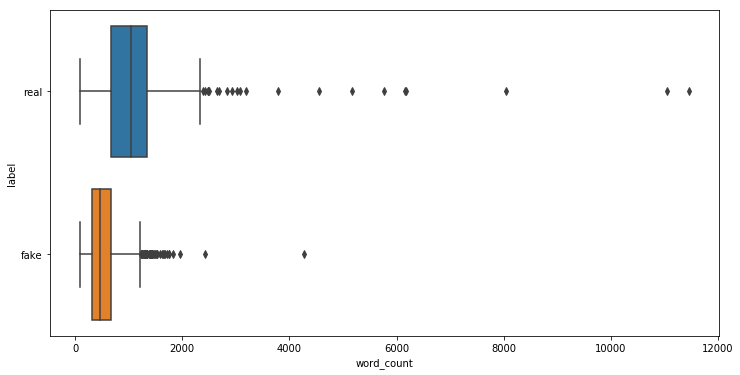

In [0]:
# plot of word counts for real vs fake content
plt.figure(figsize=(12,6))
sns.boxplot(x="word_count", y="label", data=df_body)

In [0]:
# number of documents having length <= 700
print(sum(df_body['word_count'][df_body.label=='fake'].apply(lambda x: x<=700)))
print(sum(df_body['word_count'][df_body.label=='real'].apply(lambda x: x<=700)))

# document lengths sorted in decreasing order
print(sorted(df_body['word_count'][df_body.label=='fake'], reverse=True))
print(sorted(df_body['word_count'][df_body.label=='real'], reverse=True))


757
228
[4268, 2428, 1958, 1829, 1754, 1753, 1706, 1679, 1659, 1639, 1621, 1581, 1536, 1525, 1504, 1488, 1463, 1447, 1437, 1432, 1428, 1417, 1411, 1411, 1392, 1392, 1387, 1380, 1345, 1342, 1336, 1327, 1324, 1323, 1320, 1316, 1307, 1299, 1293, 1290, 1288, 1282, 1261, 1253, 1252, 1252, 1246, 1233, 1222, 1208, 1197, 1183, 1176, 1175, 1174, 1167, 1166, 1159, 1159, 1148, 1145, 1143, 1139, 1139, 1137, 1121, 1119, 1116, 1114, 1111, 1110, 1101, 1101, 1098, 1097, 1096, 1096, 1096, 1088, 1074, 1063, 1063, 1056, 1050, 1049, 1046, 1038, 1038, 1032, 1032, 1017, 1011, 1001, 998, 997, 992, 985, 980, 979, 975, 974, 973, 971, 964, 962, 957, 955, 955, 953, 952, 948, 947, 941, 937, 935, 932, 931, 929, 927, 919, 915, 913, 906, 904, 902, 898, 896, 893, 893, 893, 889, 888, 886, 886, 885, 885, 882, 879, 879, 875, 873, 867, 864, 858, 856, 854, 853, 852, 851, 848, 847, 842, 840, 840, 838, 835, 833, 833, 832, 830, 824, 824, 823, 823, 823, 822, 821, 820, 818, 818, 815, 814, 812, 810, 809, 808, 805, 804, 799, 792

In [0]:
# number of documents having length < 4
print(sum(df_statements['statement'].apply(lambda x: len(x.split())<4)))
print(sum(df_body['statement'].apply(lambda x: len(x.split())<4)))

219
0


In [0]:
## identifying repeated strings/sentences in content dataset
# We ran random forests feature importance multiple times to identify below strings

ad_string = 'trending katie hopkins warns americans grave danger ahead great country become united kingdom'
print(sum(df_body['statement'].apply(lambda x: ad_string in (x))))

c_string1 = 'welcome guide national host'
print(sum(df_body['statement'].apply(lambda x: c_string1 in (x))))

c_string2 = 'busy american biggest stories might missed links read'
print(sum(df_body['statement'].apply(lambda x: c_string2 in (x))))

c_string3 = 'stories making news washington today'
print(sum(df_body['statement'].apply(lambda x: c_string3 in (x))))

c_string4 = 'love hear email'
print(sum(df_body['statement'].apply(lambda x: c_string4 in (x))))

c_string6 = 'forwarded subscribe delivered'
print(sum(df_body['statement'].apply(lambda x: c_string6 in (x))))

c_string7 = 'today briefing compiled'
print(sum(df_body['statement'].apply(lambda x: c_string7 in (x))))

c_string8 = 'isabella grull'
print(sum(df_body['statement'].apply(lambda x: c_string8 in (x))))

c_string10 = 'read story'
print(sum(df_body['statement'].apply(lambda x: c_string10 in (x))))

977
84
23
127
241
157
141
101
51


In [0]:
# keep headline documents having length > 2
df_statements = df_statements[df_statements['statement'].apply(lambda x: len(x.split())>2)]
print(df_statements.head())

df_body['statement'] = df_body['statement'].apply(lambda x: x.replace(ad_string, " "))
df_body['statement'] = df_body['statement'].apply(lambda x: x.replace(c_string1, " "))
df_body['statement'] = df_body['statement'].apply(lambda x: x.replace(c_string2, " "))
df_body['statement'] = df_body['statement'].apply(lambda x: x.replace(c_string3, " "))
df_body['statement'] = df_body['statement'].apply(lambda x: x.replace(c_string4, " "))
df_body['statement'] = df_body['statement'].apply(lambda x: x.replace(c_string6, " "))
df_body['statement'] = df_body['statement'].apply(lambda x: x.replace(c_string7, " "))
df_body['statement'] = df_body['statement'].apply(lambda x: x.replace(c_string8, " "))
df_body['statement'] = df_body['statement'].apply(lambda x: x.replace(c_string10, " "))

# remove content documents having length < 4
df_body = df_body[df_body['statement'].apply(lambda x: len(x.split())>3)]

# remove content documents having word count > 700
df_body = df_body[df_body['word_count'].apply(lambda x: x<=700)]
df_body.head()

                                    statement label  punc_count  word_count
0                  mueller report cheat sheet  real           2           7
3  jonathan greenblatt head white nationalism  real           5          12
4                       zombie style american  real           0           6
5       america hopelessly polarized allergic  real           2           9
6                 pelosi cautions impeachment  real           1           6


,statement,label,punc_count,word_count,sent_count
1,william barr charged hearing latest democratic...,real,143,595,20
6,speaker nancy pelosi denounced president une...,real,88,488,16
10,contentious hearing marked deep partisan div...,real,109,531,18
12,former vice president joseph biden announced...,real,115,556,14
13,federal reserve halted rate increases cuts t...,real,97,555,19


In [0]:
# transforming labels to 0-1: fake=1 , real=0
df_statements.replace(['fake', 'real'], [1,0], inplace=True)
df_body.replace(['fake', 'real'], [1,0], inplace=True)

print(df_statements.head())
print(df_statements.tail())
print(df_body.head())
print(df_body.tail())

                                    statement  label  punc_count  word_count
0                  mueller report cheat sheet      0           2           7
3  jonathan greenblatt head white nationalism      0           5          12
4                       zombie style american      0           0           6
5       america hopelessly polarized allergic      0           2           9
6                 pelosi cautions impeachment      0           1           6
                                              statement  label  punc_count  \
1003  priceless mike huckabee responds leftist hater...      1           1   
1004  remember oprah whole generation white people r...      1           7   
1005  trump curtail sentence former obama crony demo...      1           4   
1006  stunning obama 2012 campaign official reveals ...      1           7   
1007  room melts young gets bear president trump rig...      1           4   

      word_count  
1003          14  
1004          18  
1005        

In [0]:
# subsampling and merging dataset
real_s = df_statements[df_statements.label==0]
fake_s = df_statements[df_statements.label==1]

print("# of real headline docs:",real_s.shape)
print("# of fake headline docs:",fake_s.shape)

real_b = df_body[df_body.label==0]
fake_b = df_body[df_body.label==1]

print("# of real content docs:",real_b.shape)
print("# of fake content docs:",fake_b.shape)

df_statements = fake_s.sample(frac=real_s.shape[0]/fake_s.shape[0]).reset_index(drop=True)\
                .append(real_s)
 
df_body = fake_b.sample(frac=real_b.shape[0]/fake_b.shape[0]).reset_index(drop=True).append(real_b)  

# of real headline docs: (747, 4)
# of fake headline docs: (990, 4)
# of real content docs: (228, 5)
# of fake content docs: (757, 5)


In [0]:
print('# of fake headline docs:',list(df_statements['label']).count(1))
print('# of real headline docs:',list(df_statements['label']).count(0))
print('# of fake content docs:',list(df_body['label']).count(1))
print('# of real content docs:',list(df_body['label']).count(0))

# of fake headline docs: 747
# of real headline docs: 747
# of fake content docs: 228
# of real content docs: 228


In [0]:
# function to visualize wordcloud 
def display_word_cloud(corpus):
  wordcloud = WordCloud(width = 500, height = 300, background_color = 'black').generate(corpus)
  fig = plt.figure(figsize = (8, 6), facecolor = 'k', edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

## Exploratory Data Analysis


### Wordcloud

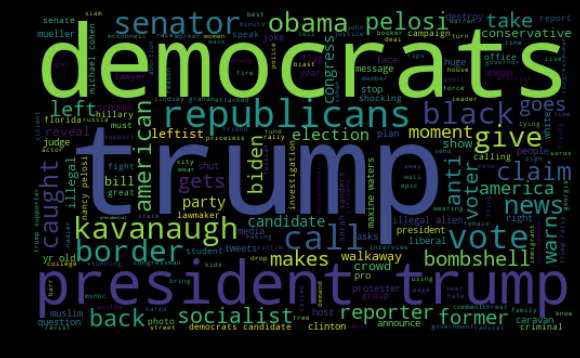

In [0]:
#fake headlies
t = (df_statements['statement'][df_statements['label']==1])
corpus = ' '.join(t)
display_word_cloud(corpus)

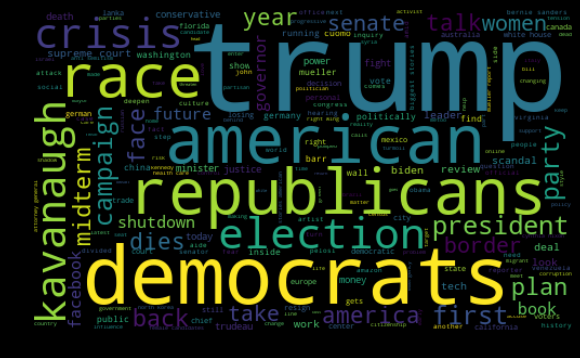

In [0]:
#real headlines
t = list(df_statements['statement'][df_statements['label']==0].values)
corpus = ' '.join(t)
display_word_cloud(corpus)

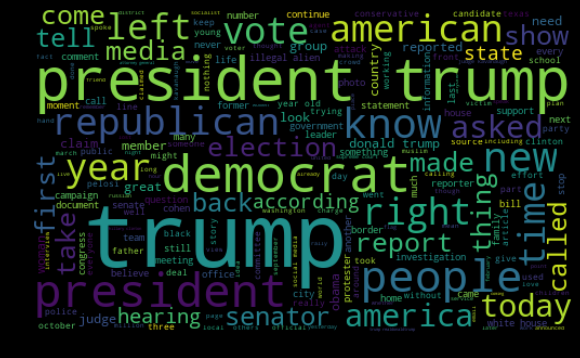

In [0]:
#fake content docs
t = list(df_body['statement'][df_body['label']==1].values)
corpus = ' '.join(t)
display_word_cloud(corpus)

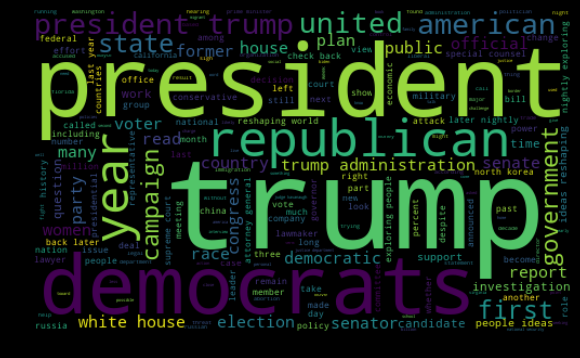

In [0]:
#real content docs
t = list(df_body['statement'][df_body['label']==0].values)
corpus = ' '.join(t)
display_word_cloud(corpus)

### Word Frequency Distribution

In [0]:
fake_statements_corpus = " ".join(df_statements['statement'][df_statements.label==1])
real_statements_corpus = " ".join(df_statements['statement'][df_statements.label==0])

fake_bodies_corpus = " ".join(df_body['statement'][df_body.label==1])
real_bodies_corpus = " ".join(df_body['statement'][df_body.label==0])

fake_st_word_dist = nltk.FreqDist(nltk.word_tokenize(fake_statements_corpus))
real_st_word_dist = nltk.FreqDist(nltk.word_tokenize(real_statements_corpus))

fake_bd_word_dist = nltk.FreqDist(nltk.word_tokenize(fake_bodies_corpus))
real_bd_word_dist = nltk.FreqDist(nltk.word_tokenize(real_bodies_corpus))


In [0]:
top_words_fake_st = sorted(fake_st_word_dist.items(), key=lambda x:x[1], reverse=True)
top_words_real_st = sorted(real_st_word_dist.items(), key=lambda x:x[1], reverse=True)

top_words_fake_bd = sorted(fake_bd_word_dist.items(), key=lambda x:x[1], reverse=True)
top_words_real_bd = sorted(real_bd_word_dist.items(), key=lambda x:x[1], reverse=True)

In [0]:
body_corpus = " ".join(df_body['statement'])

body_word_dist = nltk.FreqDist(nltk.word_tokenize(body_corpus))

top_words_body = sorted(body_word_dist.items(), key=lambda x:x[1], reverse=True)

print(len([w for w in top_words_body if w[1]>30]))

583


In [0]:
# plot distribution
def plot_word_dist(word_dict):  
  plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
  x, y =  zip(*word_dict[:30]) 
  plt.barh(x,y)
  plt.show()

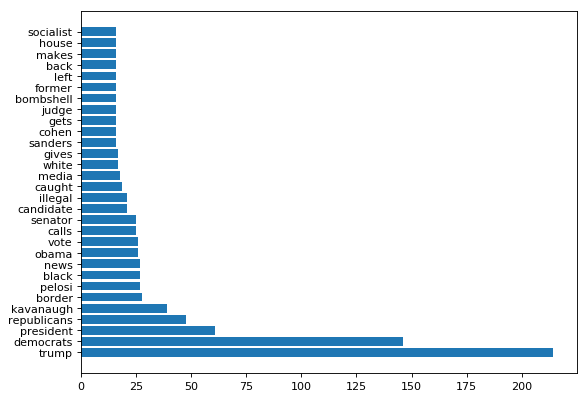

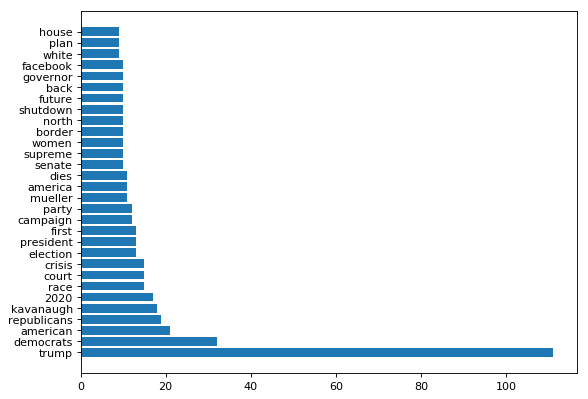

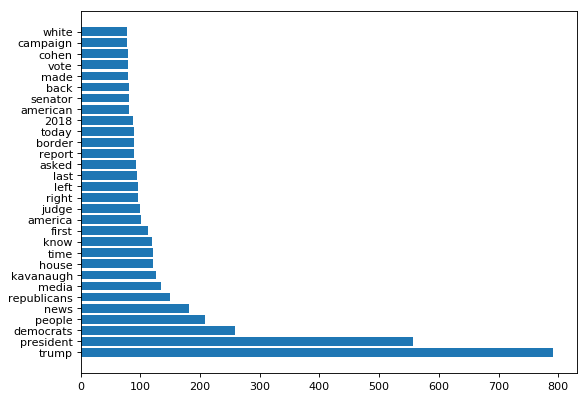

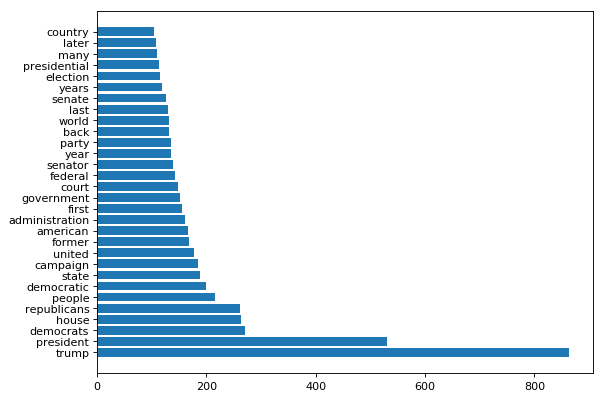

In [0]:
#Top 30 most frequently occuring words in fake headlines
plot_word_dist(top_words_fake_st)

#Top 30 most frequently occuring words in real headlines
plot_word_dist(top_words_real_st)

#Top 30 most frequently occuring words in fake content
plot_word_dist(top_words_fake_bd)

#Top 30 most frequently occuring words in real headlines
plot_word_dist(top_words_real_bd)

### Random Forest Feature Importance 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf_body = TfidfVectorizer(max_features=500)
body_ = tfidf_body.fit_transform(df_body['statement'])

rf_clf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=42)
rf_clf.fit(body_, df_body['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
features = tfidf_body.get_feature_names()
importances = rf_clf.feature_importances_

# extracting top 30 most important features
indices = np.argsort(importances)[::-1][:30]

importances[indices]

array([0.04086564, 0.02355034, 0.01984535, 0.01866195, 0.01683227,
       0.01434274, 0.01318928, 0.01294483, 0.01268425, 0.01158468,
       0.01147696, 0.01124518, 0.01068627, 0.01056799, 0.01038671,
       0.00987089, 0.00980359, 0.00896827, 0.0089455 , 0.00831127,
       0.00798463, 0.00767983, 0.00757061, 0.00739544, 0.00725694,
       0.00715082, 0.00709334, 0.0070036 , 0.00687944, 0.00667067])

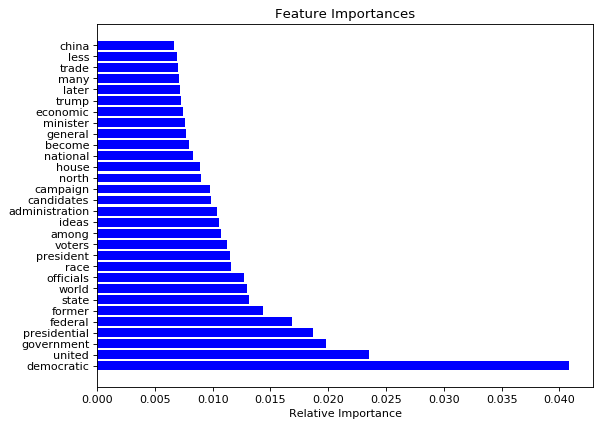

In [0]:
# plot top 30 most important features
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Apply models

In [0]:
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
import gensim
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [0]:
# function to perform cross-validation
def perform_cross_validation(clf, data, labels, folds, metrics):    
    cv = cross_validate(clf, data, labels, scoring=metrics, cv=folds, return_train_score=True)    
    return cv

### SVM

In [0]:
### GridSearch to find best Tf-Idf params for SVM ###

# using f1_macro as scoring parameter for grid serach
metric = 'f1_macro'

# developing pipeline of features and classifier
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', svm.LinearSVC())
])

# dictionary of hyperparameters to be tuned
params = {        
    'tfidf__min_df':[3,5,7],
    'tfidf__ngram_range':[(1,3),(1,4), (1,5), (1,6)],
    'tfidf__analyzer':['word','char_wb']
}

# developing gridsearch model
gs_clf = GridSearchCV(clf, param_grid=params, scoring=metric, cv=5)

# fitting model on train set for hyperparameter tuning
gs_clf_fitted = gs_clf.fit(df_statements['statement'], df_statements['label'])

# printing best params 
for param in gs_clf_fitted.best_params_:
    print(param, ":", gs_clf_fitted.best_params_[param])

print("Best f1_macro: ", gs_clf_fitted.best_score_ )

tfidf__analyzer : char_wb
tfidf__min_df : 7
tfidf__ngram_range : (1, 6)
Best f1_macro:  0.8471098637743081


In [0]:
##### Converting docs to Tf-Idfs #####

#content dataset
tfidf_ = TfidfVectorizer(max_features=500)
tfidf_body = tfidf_.fit_transform(df_body['statement']).toarray()  

#headlines dataset
tfidf_statement = TfidfVectorizer(analyzer ='char_wb', ngram_range=(1,6), min_df=7).fit_transform(df_statements['statement']).toarray() 

print("Shape of Tf-Idf matrix for content dataset:",tfidf_body.shape)
print("Shape of Tf-Idf matrix for headlines dataset:",tfidf_statement.shape)

Shape of Tf-Idf matrix for content dataset: (456, 500)
Shape of Tf-Idf matrix for headlines dataset: (1494, 6977)


In [0]:
##### Training model #####

# Using SVM with linear kernel for classification
svm_clf = svm.LinearSVC()

# 5-fold cross validation  
cv_svm_body = perform_cross_validation(svm_clf, tfidf_body,  df_body['label'] , 5, ['accuracy', 'f1_macro']) 

cv_svm_statement = perform_cross_validation(svm_clf, tfidf_statement,  df_statements['label'] , 5, ['accuracy', 'f1_macro']) 


In [0]:
##### Report scores #####
print("Content dataset:")
print("Average train f1_macro:", np.mean(cv_svm_body['train_f1_macro'])*100.0)
print("Average test f1_macro:", np.mean(cv_svm_body['test_f1_macro'])*100.0)

print("Average train accuracy:", np.mean(cv_svm_body['train_accuracy'])*100.0)
print("Average test accuray:", np.mean(cv_svm_body['test_accuracy'])*100.0)

print("\nHeadlines dataset:")
print("Average train f1_macro:", np.mean(cv_svm_statement['train_f1_macro'])*100.0)
print("Average test f1_macro:", np.mean(cv_svm_statement['test_f1_macro'])*100.0)

print("Average train accuracy:", np.mean(cv_svm_statement['train_accuracy'])*100.0)
print("Average test accuracy:", np.mean(cv_svm_statement['test_accuracy'])*100.0)

Content dataset:
Average train f1_macro: 99.94535478332276
Average test f1_macro: 89.19926753775242
Average train accuracy: 99.94535519125684
Average test accuray: 89.22222222222223

Headlines dataset:
Average train f1_macro: 99.38090106082997
Average test f1_macro: 85.2593755319113
Average train accuracy: 99.38090676347177
Average test accuracy: 85.2800894854586


### MNB

In [0]:
### GridSearch to find best Tf-Idf params for MNB ###

# using accuracy as scoring parameter for grid serach
metric = 'f1_macro'

# developing pipeline of features and classifier
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# dictionary of hyperparameters to be tuned
params = {        
    'tfidf__min_df':[1,2,3,4,5],
    'tfidf__ngram_range':[(1,3),(1,4), (1,5), (1,6)],
    'clf__alpha':[0.5,1,2]
}

# developing gridsearch model
gs_clf = GridSearchCV(clf, param_grid=params, scoring=metric, cv=5)

# fitting model on train set for hyperparameter tuning
gs_clf_fitted = gs_clf.fit(df_statements['statement'], df_statements['label'])

# printing best params 
for param in gs_clf_fitted.best_params_:
    print(param, ":", gs_clf_fitted.best_params_[param])

print("Best f1_macro: ", gs_clf_fitted.best_score_ )

clf__alpha : 0.5
tfidf__min_df : 1
tfidf__ngram_range : (1, 4)
Best f1_macro:  0.7912532205769192


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
##### Converting docs to Tf-Idfs #####

#content dataset
tfidf_ = TfidfVectorizer(max_features=500)
tfidf_body = tfidf_.fit_transform(df_body['statement']).toarray()  

#headlines dataset
tfidf_statement = TfidfVectorizer(ngram_range=(1,4)).fit_transform(df_statements['statement']).toarray() 

print("Shape of Tf-Idf matrix for content dataset:",tfidf_body.shape)
print("Shape of Tf-Idf matrix for headlines dataset:",tfidf_statement.shape)

Shape of Tf-Idf matrix for content dataset: (456, 500)
Shape of Tf-Idf matrix for headlines dataset: (1494, 26900)


In [0]:
mnb = MultinomialNB()

#5-fold cross validation
cv_mnb_content = perform_cross_validation(mnb, tfidf_body, df_body['label'], 5, ['accuracy', 'f1_macro']) 
cv_mnb_statements = perform_cross_validation(mnb, tfidf_statement, df_statements['label'], 5, ['accuracy', 'f1_macro']) 


In [0]:
##### Report scores #####
print("Content dataset:")
print("Average train f1_macro:", np.mean(cv_mnb_content['train_f1_macro'])*100.0)
print("Average test f1_macro:", np.mean(cv_mnb_content['test_f1_macro'])*100.0)

print("Average train accuracy:", np.mean(cv_mnb_content['train_accuracy'])*100.0)
print("Average test accuray:", np.mean(cv_mnb_content['test_accuracy'])*100.0)

print("\nHeadlines dataset:")
print("Average train f1_macro:", np.mean(cv_mnb_statements['train_f1_macro'])*100.0)
print("Average test f1_macro:", np.mean(cv_mnb_statements['test_f1_macro'])*100.0)

print("Average train accuracy:", np.mean(cv_mnb_statements['train_accuracy'])*100.0)
print("Average test accuracy:", np.mean(cv_mnb_statements['test_accuracy'])*100.0)

Content dataset:
Average train f1_macro: 93.69336582467194
Average test f1_macro: 86.73608819484713
Average train accuracy: 93.69513000660541
Average test accuray: 86.80193236714976

Headlines dataset:
Average train f1_macro: 99.98327758028263
Average test f1_macro: 74.07597990731804
Average train accuracy: 99.98327759197323
Average test accuracy: 74.31096196868009


### Random Forest

In [0]:
### GridSearch Random Forest ###

# using f1_macro as scoring parameter for grid serach
metric = 'f1'

# developing pipeline of features and classifier
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=42))
])

# dictionary of hyperparameters to be tuned
params = {        
    'tfidf__min_df':[3,5,7],
    'tfidf__ngram_range':[(1,3),(1,4), (1,5), (1,6)],
    'tfidf__analyzer':['word','char_wb']
}

# developing gridsearch model
gs_clf = GridSearchCV(clf, param_grid=params, scoring=metric, cv=5)

# fitting model on train set for hyperparameter tuning
gs_clf_fitted = gs_clf.fit(df_statements['statement'], df_statements['label'])

# printing best params 
for param in gs_clf_fitted.best_params_:
    print(param, ":", gs_clf_fitted.best_params_[param])

print("Best accuracy: ", gs_clf_fitted.best_score_ )

tfidf__analyzer : char_wb
tfidf__min_df : 5
tfidf__ngram_range : (1, 3)
Best accuracy:  0.8546363847588198


In [0]:
##### Converting docs to Tf-Idfs #####

#content dataset
tfidf_ = TfidfVectorizer(max_features=500)
tfidf_body = tfidf_.fit_transform(df_body['statement']).toarray()  

#headlines dataset
tfidf_statement = TfidfVectorizer(ngram_range=(1,3), min_df=5, analyzer='char_wb').fit_transform(df_statements['statement']).toarray() 

print("Shape of Tf-Idf matrix for content dataset:",tfidf_body.shape)
print("Shape of Tf-Idf matrix for headlines dataset:",tfidf_statement.shape)

Shape of Tf-Idf matrix for content dataset: (456, 500)
Shape of Tf-Idf matrix for headlines dataset: (1494, 2539)


In [0]:
rf_clf = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=42)

cv_rf_body = perform_cross_validation(rf_clf, tfidf_body,  df_body['label'] , 5, ['accuracy', 'f1_macro']) 
cv_rf_statement = perform_cross_validation(rf_clf, tfidf_statement,  df_statements['label'] , 5, ['accuracy', 'f1_macro']) 

In [0]:
##### Report scores #####
print("Content dataset:")
print("Average train f1_macro:", np.mean(cv_rf_body['train_f1_macro'])*100.0)
print("Average test f1_macro:", np.mean(cv_rf_body['test_f1_macro'])*100.0)

print("Average train accuracy:", np.mean(cv_rf_body['train_accuracy'])*100.0)
print("Average test accuray:", np.mean(cv_rf_body['test_accuracy'])*100.0)

print("\nHeadlines dataset:")
print("Average train f1_macro:", np.mean(cv_rf_statement['train_f1_macro'])*100.0)
print("Average test f1_macro:", np.mean(cv_rf_statement['test_f1_macro'])*100.0)

print("Average train accuracy:", np.mean(cv_rf_statement['train_accuracy'])*100.0)
print("Average test accuracy:", np.mean(cv_rf_statement['test_accuracy'])*100.0)

Content dataset:
Average train f1_macro: 100.0
Average test f1_macro: 86.33825741769014
Average train accuracy: 100.0
Average test accuray: 86.57971014492753

Headlines dataset:
Average train f1_macro: 100.0
Average test f1_macro: 84.89965836114848
Average train accuracy: 100.0
Average test accuracy: 84.94183445190157


### CNN

In [0]:
# !pip install paramiko
from gensim.models import Word2Vec

In [0]:
# keras import for CNN
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, GlobalMaxPooling1D
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.preprocessing import sequence, text
from keras.initializers import Constant
from keras.callbacks import EarlyStopping

In [0]:
# statements = df_statements['statement'].apply(lambda x: nltk.word_tokenize(x)).values.tolist()
bodies = df_body['statement'].apply(lambda x: nltk.word_tokenize(x)).values.tolist()

In [0]:
# w2v_model = Word2Vec(statements, min_count=1)
w2v_model = Word2Vec(bodies, min_count=1)
print(w2v_model)

# vocabulary
words = list(w2v_model.wv.vocab)

model_vecs = w2v_model[w2v_model.wv.vocab]
print(model_vecs.shape)

Word2Vec(vocab=15169, size=100, alpha=0.025)
(15169, 100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [0]:
print("Maximum length among all documents:",max(df_body['word_count']))
MAX_SEQUENCE_LENGTH = max(df_body['word_count'])

Maximum length among all documents: 700


In [0]:
# parameters
VOCAB_SIZE = 500
EMBEDDING_DIMS = model_vecs.shape[1]

FILTERS = 128 #number of filters/size of output layer/features maps
KERNEL_SIZE = 7 #filter window size
BATCH_SIZE = 50
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

In [0]:
# Zero padding
X_train, X_test, y_train, y_test = train_test_split(df_body['statement'], df_body['label'], random_state=0, test_size=0.3)

tokenizer = text.Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)

train = tokenizer.texts_to_matrix(X_train)
test = tokenizer.texts_to_matrix(X_test)

print(X_train.head())
print(y_train.head())

train = sequence.pad_sequences(train, maxlen=MAX_SEQUENCE_LENGTH)
test = sequence.pad_sequences(test, maxlen=MAX_SEQUENCE_LENGTH)

print(train.shape)
print(test.shape)

153    lucy flores writes stunning description first-...
164    audio recording community prayer breakfast hea...
194    houston trump rally huge success inside photos...
20       much anticipated report special counsel robe...
186    last month republicans d-mn first female somal...
Name: statement, dtype: object
153    1
164    1
194    1
20     0
186    1
Name: label, dtype: int64
(319, 700)
(137, 700)


In [0]:
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIMS))

# using pretrained glove
embeddings_index = dict()
f = open('/content/gdrive/My Drive/Stevens/Spring 2019/ML/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

for word, index in tokenizer.word_index.items():
    if index > VOCAB_SIZE - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

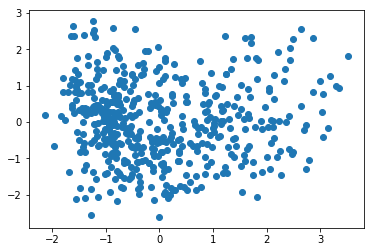

In [0]:
from sklearn.decomposition import PCA

# PCA plot to understand word clustering after creating word embeddings
pca = PCA(n_components=2).fit_transform(embedding_matrix)

# plt.figure(figsize=(16, 16))
plt.scatter(pca[:,0], pca[:,1])

# to annotate each point with word label
# for i, word in enumerate(words):
#   if i%2 == 0:
#     plt.annotate(word, xy=(pca[i, 0], pca[i, 1]))

plt.show()


In [0]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(VOCAB_SIZE,
                            EMBEDDING_DIMS,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print('Training model.')

# CNN with word embeddings
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Dropout(0.5)(embedded_sequences)
x = Conv1D(FILTERS, KERNEL_SIZE, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(FILTERS, KERNEL_SIZE, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(FILTERS, KERNEL_SIZE, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(FILTERS, activation='relu')(x)

preds = Dense(1, activation='sigmoid')(x)

Training model.


In [0]:
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 700)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 700, 100)          50000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 700, 100)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 694, 128)          89728     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 138, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 132, 128)          114816    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 26, 128)           0         
__________

In [0]:
EPOCHS = 50

history = model.fit(train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split = 0.2,
          callbacks=[es_callback])

Train on 255 samples, validate on 64 samples
Epoch 1/50
255/255 [==============================] - 3s 12ms/step - loss: 0.7067 - acc: 0.4667 - val_loss: 0.7040 - val_acc: 0.4844
Epoch 2/50
255/255 [==============================] - 3s 11ms/step - loss: 0.6402 - acc: 0.6314 - val_loss: 0.6042 - val_acc: 0.7500
Epoch 3/50
255/255 [==============================] - 3s 11ms/step - loss: 0.5473 - acc: 0.7490 - val_loss: 0.7357 - val_acc: 0.5469
Epoch 4/50
255/255 [==============================] - 3s 11ms/step - loss: 0.7310 - acc: 0.6314 - val_loss: 1.0295 - val_acc: 0.5156
Epoch 5/50
255/255 [==============================] - 3s 11ms/step - loss: 0.8636 - acc: 0.5843 - val_loss: 0.7877 - val_acc: 0.5625
Epoch 6/50
255/255 [==============================] - 3s 11ms/step - loss: 0.6239 - acc: 0.6392 - val_loss: 0.6172 - val_acc: 0.6563
Epoch 7/50
255/255 [==============================] - 3s 11ms/step - loss: 0.5639 - acc: 0.7176 - val_loss: 0.6031 - val_acc: 0.6406
Epoch 8/50
255/255 [====

In [0]:
print("Avg. train accuracy:",np.mean(history.history['acc']))
print("Avg.val accuracy:",np.mean(history.history['val_acc']))

Avg. train accuracy: 0.7993674879301055
Avg.val accuracy: 0.6975806498779885


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


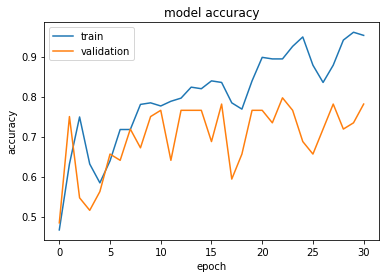

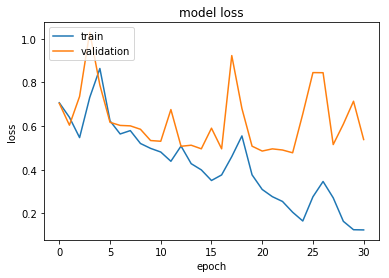

In [0]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# predictions using pretrained glove
prediction = model.predict(test)

final_preds = np.where(prediction > 0.5, 1, 0)

y_test.shape

(137,)

In [0]:
## Report Scores ##
from sklearn import metrics
from sklearn.metrics import f1_score

print("Accuracy:",metrics.accuracy_score(y_test, final_preds))
print(metrics.classification_report(y_test, final_preds, labels=[0,1]))

print("f1-Score:",f1_score(y_test, final_preds, pos_label=1))

Accuracy: 0.8029197080291971
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        69
           1       0.77      0.85      0.81        68

   micro avg       0.80      0.80      0.80       137
   macro avg       0.81      0.80      0.80       137
weighted avg       0.81      0.80      0.80       137

f1-Score: 0.8111888111888111
